# Week 7 Part II Notebook

In Part II of my notebook, I will explore BRT and rail use and map the BRT and rail lines

### Import necessary libraries

In [1]:
# to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Import datasets

In [2]:
qol_2017 = gpd.read_file('qol_wards_2017_clean.geojson')

In [3]:
qol_2011 = gpd.read_file('qol_wards_2011_clean.geojson')

Importing these datasets takes up a lot of memory. We cleaned the GCRO QoL datasets, merged them with their corresponding wards spatial dataset, and saved it as a geojson to avoid having to do a data merge in each notebook. **Is it better to do a merge in each notebook or use the geojson?**

### Checking the data

In [4]:
qol_2017.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   WardID                         24889 non-null  int64   
 1   LocalMunicipalityName          24889 non-null  object  
 2   DistrictMunicipalityName       24889 non-null  object  
 3   Shape__Area                    24889 non-null  float64 
 4   Shape__Length                  24889 non-null  float64 
 5   A1_Pop_group                   24889 non-null  object  
 6   A2_Sex                         24889 non-null  object  
 7   Q5_01_frequent_trip            24889 non-null  object  
 8   Q5_06_1_Walk                   23924 non-null  object  
 9   Q5_06_2_Bike                   23924 non-null  object  
 10  Q5_06_3_Motorbike              23924 non-null  object  
 11  Q5_06_4_Car_driver             23924 non-null  object  
 12  Q5_06_5_Car_passenger   

In [5]:
qol_2011.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   WardID                                        16730 non-null  int64   
 1   LocalMunicipalityName                         16730 non-null  object  
 2   DistrictMunicipalityName                      16730 non-null  object  
 3   Shape__Area                                   16730 non-null  float64 
 4   Shape__Length                                 16730 non-null  float64 
 5   A1_Pop_Group                                  16729 non-null  float64 
 6   A2_Sex                                        16729 non-null  float64 
 7   A_4_1_Frequent_trip_purpose                   16561 non-null  float64 
 8   Q4_5 Walk_Frequent_Trip_Transp                2923 non-null   float64 
 9   Q4_5 Bike_Frequent_Trip_Transp            

### Proximity to Public Transport

We are interested in seeing if walking proximity to public transport has changed over time, especially given the construction of BRT between 2011 and 2017

#### 2011

In [6]:
#normalize the data
prox_pub_transp_11 = qol_2011[['A_4_8_Walking_proxim_pub_transp_recode']].value_counts(normalize=True)*100

#reset index to create a df
prox_pub_transp_11 = prox_pub_transp_11.reset_index(name='Percent')

prox_pub_transp_11

A_4_8_Walking_proxim_pub_transp_recode    Percent
0                  Up to 10 minutes walk  62.877662
1             From 11 to 20 minutes walk  15.292224
2                             Don’t know  12.363794
3             From 21 to 30 minutes walk   5.120109
4              More than 40 minutes walk   2.550768
5             From 31 to 40 minutes walk   1.795443

In [7]:
# normalize the data
prox_pub_transp_17 = qol_2017[['Q5_18_Walk_prox_public_transp']].value_counts(normalize=True)*100

#reset index to create a df
prox_pub_transp_17 = prox_pub_transp_17.reset_index(name='Percent')

#check out the data
prox_pub_transp_17

Q5_18_Walk_prox_public_transp    Percent
0              Up to 10 minutes  65.330065
1         From 11 to 20 minutes  19.498574
2                    Don't know   8.417373
3         From 21 to 30 minutes   4.893728
4         From 31 to 40 minutes   1.096870
5          More than 40 minutes   0.763389

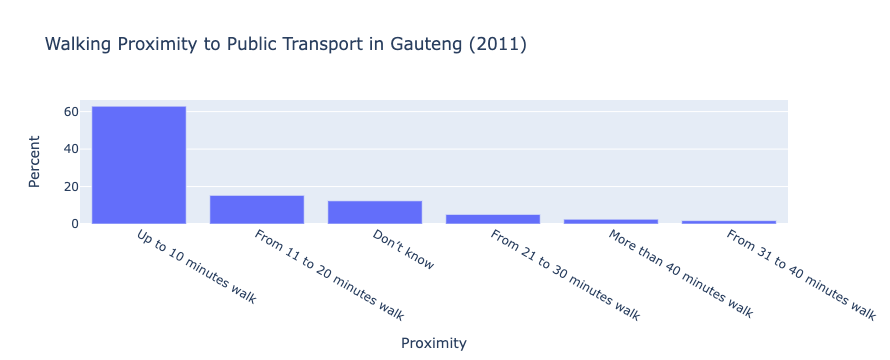

In [8]:
fig = px.bar(prox_pub_transp_11,
       y='Percent',
       x= 'A_4_8_Walking_proxim_pub_transp_recode',
             title='Walking Proximity to Public Transport in Gauteng (2011)',
                labels={
            'percent':'Percent',
                    'A_4_8_Walking_proxim_pub_transp_recode': 'Proximity'})

fig.show()

#### 2017

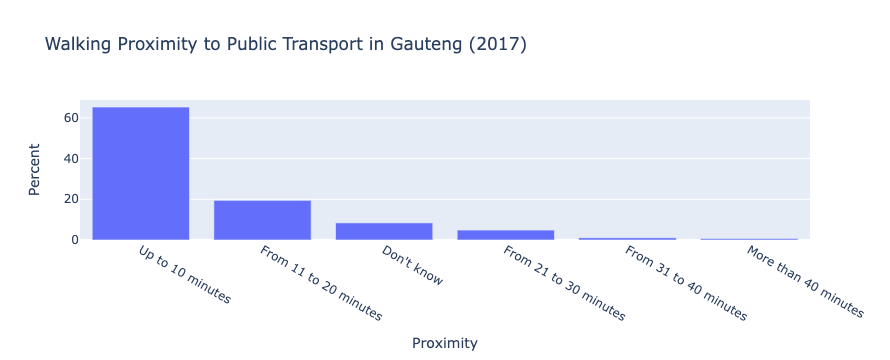

In [9]:
fig = px.bar(prox_pub_transp_17,
       y='Percent',
       x= 'Q5_18_Walk_prox_public_transp',
             title='Walking Proximity to Public Transport in Gauteng (2017)',
                labels={
            'percent':'Percent',
                    'Q5_18_Walk_prox_public_transp': 'Proximity'})

fig.show()

It seems that, between 2011 and 2017, there is an increase in the percentage of people who live within 10 minute and between 11 and 20 minute walking distance of public transport. In 2017 there is a smaller perecntage of people who live more than 30 minutes from public transportation. **Note**: For future notebooks, I would like to plot the years side by side in the same bar chart

### Modes of Transportation Used for Most Frequent Trip

There is a question in both the 2011 and 2017 QoL surveys that asks respondents about their most frequently made trip and the modes of transportation they use for said trip. We would like to examine if there is any difference in the use of BRT for this trip between n2011 and 2017. With the development of BRT, we would expect to see an increase in BRT use.

### BRT Use in 2011 and 2017

By creating this chart, we can get a sense of how many respondents use BRT for at least a portion of their most frequent trip. As part of our research, will be looking at the areas in which BRT use is the highest and examining attitudes in those wards

In [10]:
BRT_use_2011= qol_2011[['LocalMunicipalityName','Q4_5 BRT_Frequent_Trip_Transp']].value_counts(normalize=True)*100

BRT_use_2011 = BRT_use_2011.reset_index(name='Percent')

BRT_use_2011

LocalMunicipalityName  Q4_5 BRT_Frequent_Trip_Transp    Percent
0       City of Tshwane                            1.0  39.473684
1  City of Johannesburg                            1.0  31.578947
2            Ekurhuleni                            1.0  13.157895
3              Emfuleni                            1.0   7.894737
4         Merafong City                            1.0   5.263158
5        Rand West City                            1.0   2.631579

I see that there are three municipalities missing from this list, which I believe means there are no respondents from those municipalities. I will add empty data in order to compare it to 2017 data

In [11]:
BRT_use_2011.loc[len(BRT_use_2011.index)] = ['Mogale City', 0, 0]
BRT_use_2011.loc[len(BRT_use_2011.index)] = ['Lesedi', 0, 0]
BRT_use_2011.loc[len(BRT_use_2011.index)] = ['Midvaal', 0, 0]

BRT_use_2011

LocalMunicipalityName  Q4_5 BRT_Frequent_Trip_Transp    Percent
0       City of Tshwane                            1.0  39.473684
1  City of Johannesburg                            1.0  31.578947
2            Ekurhuleni                            1.0  13.157895
3              Emfuleni                            1.0   7.894737
4         Merafong City                            1.0   5.263158
5        Rand West City                            1.0   2.631579
6           Mogale City                            0.0   0.000000
7                Lesedi                            0.0   0.000000
8               Midvaal                            0.0   0.000000

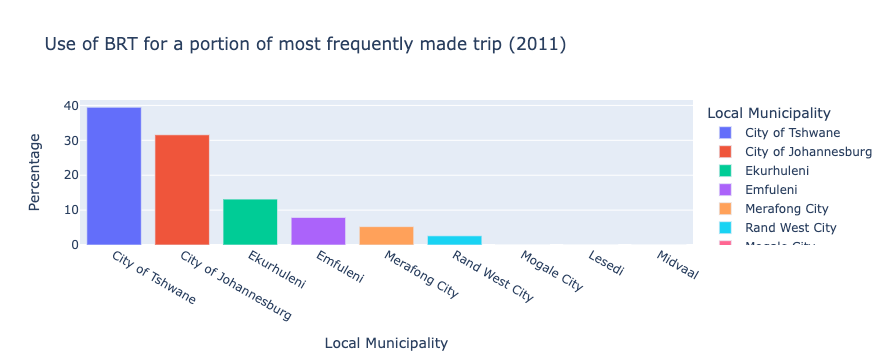

In [12]:
fig = px.bar(BRT_use_2011,
       y='Percent',
       x= 'LocalMunicipalityName',
             title='Use of BRT for a portion of most frequently made trip (2011)',
              color='LocalMunicipalityName',
                labels={
            'Percent':'Percentage',
                    'LocalMunicipalityName': 'Local Municipality'})

fig.show()

In [13]:
BRT_use_2017= qol_2017[['LocalMunicipalityName','Q5_06_10_BRT_TRT']].value_counts(normalize=True)*100

BRT_use_2017 = BRT_use_2017.reset_index(name='Percent')

BRT_use_2017

LocalMunicipalityName Q5_06_10_BRT_TRT    Percent
0   City of Johannesburg               No  31.169537
1             Ekurhuleni               No  25.221535
2        City of Tshwane               No  16.911888
3               Emfuleni               No   6.884300
4            Mogale City               No   5.688848
5         Rand West City               No   5.149641
6          Merafong City               No   4.163183
7                Midvaal               No   2.085772
8                 Lesedi               No   1.851697
9   City of Johannesburg              Yes   0.656245
10       City of Tshwane              Yes   0.137937
11            Ekurhuleni              Yes   0.050159
12         Merafong City              Yes   0.012540
13        Rand West City              Yes   0.008360
14              Emfuleni              Yes   0.004180
15                Lesedi              Yes   0.004180

I'm only interested in seeing the respondents who do use BRT in each municipality so I will be dropping the rows that say no

In [14]:
BRT_use_2017=BRT_use_2017.drop([0,1,2,3,4,5,6,7,8])

BRT_use_2017

LocalMunicipalityName Q5_06_10_BRT_TRT   Percent
9   City of Johannesburg              Yes  0.656245
10       City of Tshwane              Yes  0.137937
11            Ekurhuleni              Yes  0.050159
12         Merafong City              Yes  0.012540
13        Rand West City              Yes  0.008360
14              Emfuleni              Yes  0.004180
15                Lesedi              Yes  0.004180

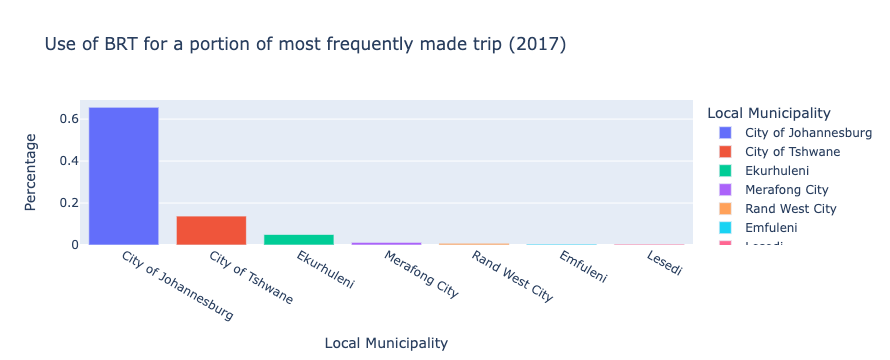

In [15]:
fig = px.bar(BRT_use_2017,
       y='Percent',
       x= 'LocalMunicipalityName',
             title='Use of BRT for a portion of most frequently made trip (2017)',
              color='LocalMunicipalityName',
                labels={
            'Percent':'Percentage',
                    'LocalMunicipalityName': 'Local Municipality'})

fig.show()

At first review, it is evident that a very small percentage of respondents use BRT in 2017 for a portion of their most frequently made trip. In both 2011 and 2017, Johannesburg and Tshwane have the highest uses of BRT.

### Rail Use in 2011 and 2017

In [16]:
rail_use_2011= qol_2011[['LocalMunicipalityName','Q4_5 Train_Frequent_Trip_Transp']].value_counts(normalize=True)*100

rail_use_2011 = rail_use_2011.reset_index(name='Percent')

rail_use_2011

LocalMunicipalityName  Q4_5 Train_Frequent_Trip_Transp    Percent
0  City of Johannesburg                              1.0  27.815385
1            Ekurhuleni                              1.0  23.507692
2       City of Tshwane                              1.0  18.215385
3              Emfuleni                              1.0  10.400000
4        Rand West City                              1.0   5.723077
5           Mogale City                              1.0   4.800000
6                Lesedi                              1.0   4.184615
7         Merafong City                              1.0   3.507692
8               Midvaal                              1.0   1.846154

In [17]:
rail_use_2017= qol_2017[['LocalMunicipalityName','Q5_06_8_train']].value_counts(normalize=True)*100

rail_use_2017 = rail_use_2017.reset_index(name='Percent')

rail_use_2017

LocalMunicipalityName Q5_06_8_train    Percent
0   City of Johannesburg            No  30.446414
1             Ekurhuleni            No  23.628992
2        City of Tshwane            No  16.318341
3               Emfuleni            No   6.675305
4            Mogale City            No   5.621970
5         Rand West City            No   5.091122
6          Merafong City            No   4.138104
7                Midvaal            No   2.010533
8                 Lesedi            No   1.843337
9             Ekurhuleni           Yes   1.642702
10  City of Johannesburg           Yes   1.379368
11       City of Tshwane           Yes   0.731483
12              Emfuleni           Yes   0.213175
13               Midvaal           Yes   0.075238
14           Mogale City           Yes   0.066878
15        Rand West City           Yes   0.066878
16         Merafong City           Yes   0.037619
17                Lesedi           Yes   0.012540

In [18]:
#Drop the nos

rail_use_2017=rail_use_2017.drop([0,1,2,3,4,5,6,7,8])

rail_use_2017

LocalMunicipalityName Q5_06_8_train   Percent
9             Ekurhuleni           Yes  1.642702
10  City of Johannesburg           Yes  1.379368
11       City of Tshwane           Yes  0.731483
12              Emfuleni           Yes  0.213175
13               Midvaal           Yes  0.075238
14           Mogale City           Yes  0.066878
15        Rand West City           Yes  0.066878
16         Merafong City           Yes  0.037619
17                Lesedi           Yes  0.012540

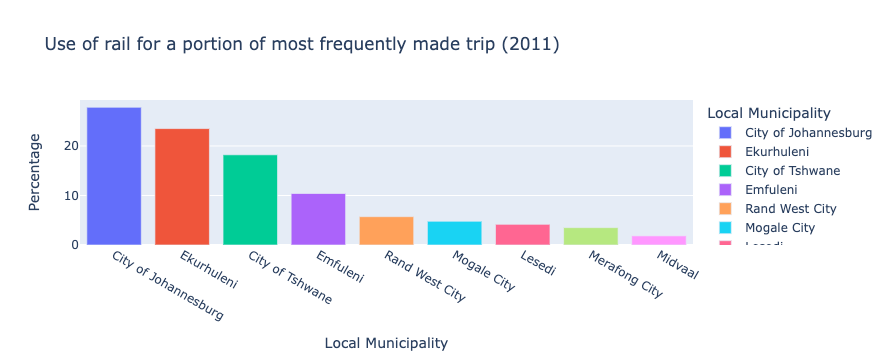

In [19]:
fig = px.bar(rail_use_2011,
       y='Percent',
       x= 'LocalMunicipalityName',
             title='Use of rail for a portion of most frequently made trip (2011)',
              color='LocalMunicipalityName',
                labels={
            'Percent':'Percentage',
                    'LocalMunicipalityName': 'Local Municipality'})

fig.show()

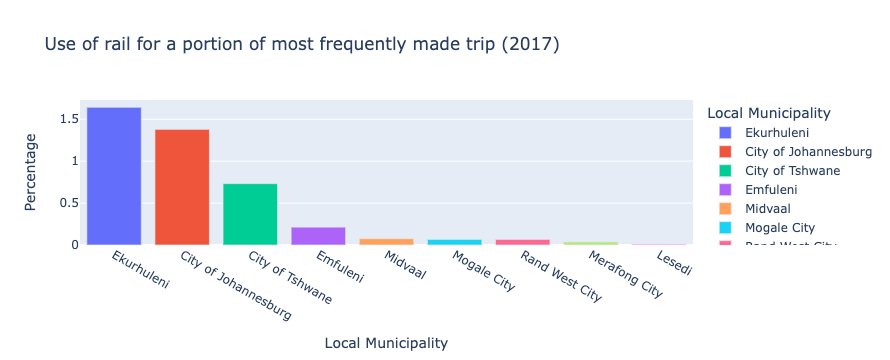

In [20]:
fig = px.bar(rail_use_2017,
       y='Percent',
       x= 'LocalMunicipalityName',
             title='Use of rail for a portion of most frequently made trip (2017)',
              color='LocalMunicipalityName',
                labels={
            'Percent':'Percentage',
                    'LocalMunicipalityName': 'Local Municipality'})

fig.show()

Upon looking, it seems that in 2017, a greater percentage of respondents from Ekurhueleni used rail for a portion of their frequently made trip than in 2011. Ekurhueleni and City of Johannesburg had the greatest number of respondents using rail in both years, and in 2017 it seems that usage had decreased overall

## Mapping BRT and Rail Lines

Now that we have a sense of where people use BRT, we'd like to see a visual of where the lines are located and start exploring the relationship between attitudes and use of public transport

#### Import data for rail and BRT lines

In [21]:
railway_lines = gpd.read_file('Railway_lines.zip', encoding="utf-8")

In [22]:
BRT_lines = gpd.read_file('Gauteng_BRT_lines.zip', encoding="utf-8")

In [23]:
railway_stations = gpd.read_file('Railway_stations.zip', encoding="utf-8")

### BRT Lines

Text(0.5, 1.0, 'BRT Lines in Gauteng')

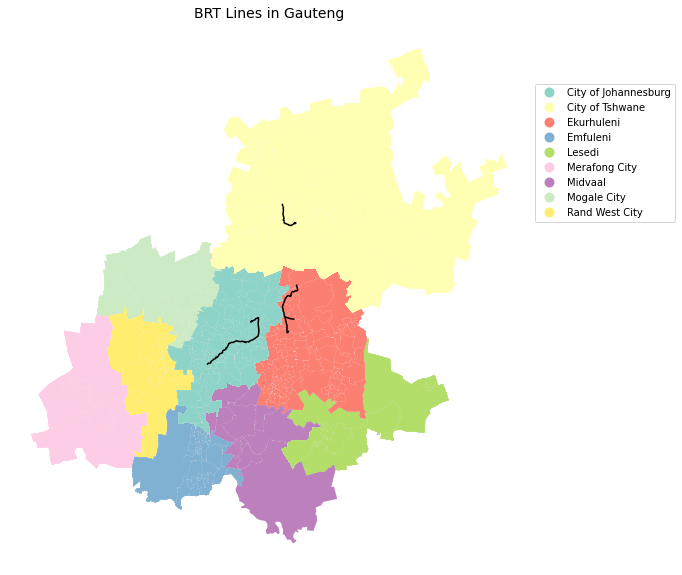

In [24]:
base = qol_2011.plot(figsize=(12,10),
                 column='LocalMunicipalityName',
                 legend=True,
                              legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
              cmap='Set3', 
                     edgecolor='white', 
                     linewidth=0.05,
                    zorder=1)

BRT_lines.plot(ax=base,
               color='black',
               markersize=10,
                   legend=False,
               zorder=1)

base.axis("off")

plt.title('BRT Lines in Gauteng', fontsize=14)

From the map, we can see that the BRT lines are located in Johannesburg, Tshwane, and Ekurhulei which aligns with our finding that a greater number of respondents in those 3 municipalities used BRT for part of their most frequently made trip. 

### Rail Lines in Gauteng

Text(0.5, 1.0, 'Rail Lines in Gauteng')

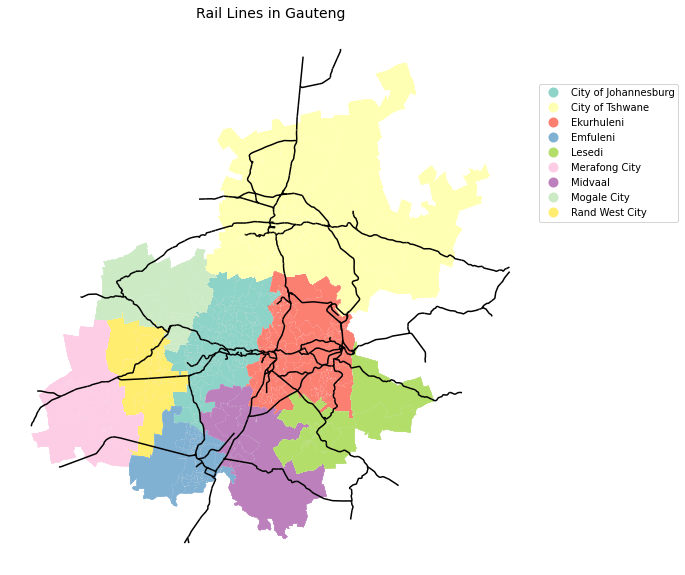

In [25]:
base = qol_2017.plot(figsize=(12,10),
                 column='LocalMunicipalityName',
                 legend=True,
                              legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
              cmap='Set3', 
                     edgecolor='white', 
                     linewidth=0.05,
                    zorder=1)

railway_lines.plot(ax=base,
               color='black',
               markersize=10,
                   legend=False,
               zorder=1)

base.axis("off")

plt.title('Rail Lines in Gauteng', fontsize=14)

The rail line is quite extensive in Gauteng and passes through each municipality. Our next step is to map the rail stations over the choropleth map we made in part 1 to see access to rail transport. 

### Access to rail lines in Gauteng

I want to recreate the choropleth map of Africans living in Gauteng

In [26]:
pop_group_ward_17 = pd.crosstab(index=qol_2017['WardID'],
                        columns=qol_2017['A1_Pop_group'],
                       margins=True,
                       margins_name='Total Number')

pop_group_ward_17

A1_Pop_group  African  Coloured  Indian/Asian  Other  White  Total Number
WardID                                                                   
74201001           11         2             0      0     23            36
74201002           36         1             0      0      0            37
74201003           28         2             0      0      4            34
74201004           24         0             0      0     10            34
74201005           13         1             0      0     17            31
...               ...       ...           ...    ...    ...           ...
79900104           36         1             0      0      0            37
79900105           27         1             0      0      3            31
79900106           37         0             0      1      0            38
79900107           47         0             0      0      0            47
Total Number    20964       892           370     85   2578         24889

[530 rows x 6 columns]

In [27]:
# create new columns and populate it with normalized data

pop_group_ward_17['Percent African'] = pop_group_ward_17['African']/pop_group_ward_17['Total Number']*100

pop_group_ward_17

A1_Pop_group  African  Coloured  Indian/Asian  Other  White  Total Number  \
WardID                                                                      
74201001           11         2             0      0     23            36   
74201002           36         1             0      0      0            37   
74201003           28         2             0      0      4            34   
74201004           24         0             0      0     10            34   
74201005           13         1             0      0     17            31   
...               ...       ...           ...    ...    ...           ...   
79900104           36         1             0      0      0            37   
79900105           27         1             0      0      3            31   
79900106           37         0             0      1      0            38   
79900107           47         0             0      0      0            47   
Total Number    20964       892           370     85   2578         24889   

A1_Pop_group  Percent African  
WardID                         
74201001            30.555556  
74201002            97.297297  
74201003            82.352941  
74201004            70.588235  
74201005            41.935484  
...                       ...  
79900104            97.297297  
79900105            87.096774  
79900106            97.368421  
79900107           100.000000  
Total Number        84.229981  

[530 rows x 7 columns]

In [28]:
pop_group_ward_17.drop(['Total Number'])

A1_Pop_group  African  Coloured  Indian/Asian  Other  White  Total Number  \
WardID                                                                      
74201001           11         2             0      0     23            36   
74201002           36         1             0      0      0            37   
74201003           28         2             0      0      4            34   
74201004           24         0             0      0     10            34   
74201005           13         1             0      0     17            31   
...               ...       ...           ...    ...    ...           ...   
79900103           36         0             0      0      0            36   
79900104           36         1             0      0      0            37   
79900105           27         1             0      0      3            31   
79900106           37         0             0      1      0            38   
79900107           47         0             0      0      0            47   

A1_Pop_group  Percent African  
WardID                         
74201001            30.555556  
74201002            97.297297  
74201003            82.352941  
74201004            70.588235  
74201005            41.935484  
...                       ...  
79900103           100.000000  
79900104            97.297297  
79900105            87.096774  
79900106            97.368421  
79900107           100.000000  

[529 rows x 7 columns]

In [29]:
#Merge this new dataframe with wards so I can map it

qol_2017= qol_2017.merge(pop_group_ward_17, on='WardID')

qol_2017.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24889 entries, 0 to 24888
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   WardID                         24889 non-null  object  
 1   LocalMunicipalityName          24889 non-null  object  
 2   DistrictMunicipalityName       24889 non-null  object  
 3   Shape__Area                    24889 non-null  float64 
 4   Shape__Length                  24889 non-null  float64 
 5   A1_Pop_group                   24889 non-null  object  
 6   A2_Sex                         24889 non-null  object  
 7   Q5_01_frequent_trip            24889 non-null  object  
 8   Q5_06_1_Walk                   23924 non-null  object  
 9   Q5_06_2_Bike                   23924 non-null  object  
 10  Q5_06_3_Motorbike              23924 non-null  object  
 11  Q5_06_4_Car_driver             23924 non-null  object  
 12  Q5_06_5_Car_passenger   

Text(0.5, 1.0, 'Rail Stations in Wards with predominately African Population Group')

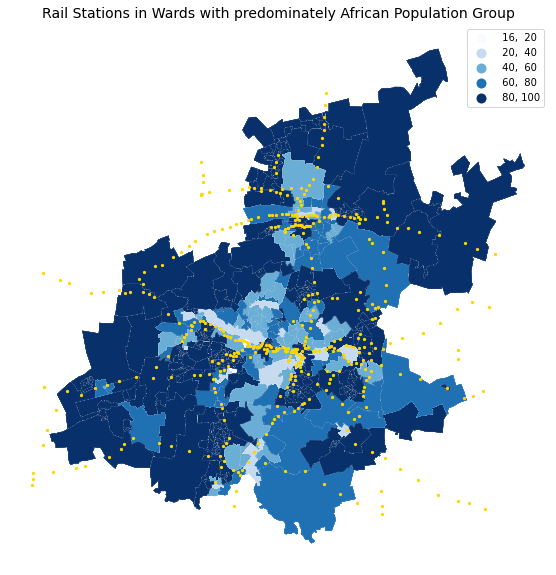

In [30]:
base = qol_2017.plot(figsize=(12,10),
                 column='Percent African',
                 legend=True,
                 scheme='user_defined',
                     classification_kwds={'bins':[20,40,60,80,100]},
                     legend_kwds={'fmt':'{:.0f}'},
              cmap='Blues', edgecolor='white', linewidth=0.05)

railway_stations.plot(ax=base, marker='o', color='gold', markersize=5);

base.axis("off")

plt.title('Rail Stations in Wards with predominately African Population Group', fontsize=14)

I think this map is really powerful, as we can see that in wards with a predominately African population (that are already on the outskirts of the city), there is very little access to rail. The majority of stations are clustered in the center of Gauteng, where lower percentages of Africans live

### Conclusion

For this week's group assignment, we were able to narrow down our variables, gather general information about Gauteng, its residents, and use of the two modes of public transit we're exploring, BRT and rail. Since we obtained spatial data of BRT and rail lines we were able to begin mapping public transport access. In future notebooks, we will begin exploring attitudes in areas were public transit use is highest and lowest and create more interactive maps